In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size':16}

plt.rcParams.update(params)

# 1 Dimensional 

Consider the function 
$$y=\text{sinc}(x+\phi)$$ 


Let's say we have some noisy observations of $y$ over the interval $[-10,10]$. and we want to find the parameter $\phi$. We will do so by computing a const function $J(\theta)$ (or, per ISLR notation $R(\theta$)), and fidning the $\theta$ that minimizes the cost function:

$$\theta=\text{argmin}\; J(\theta)=\text{argmin} \sum(y-\hat y)=\text{argmin}\sum\left( y - \text{sinc}(x+\theta)\right)$$

In [11]:
# Generate Synthetic Data
theta_true=1
n_pts=100
x=np.linspace(-5,5,n_pts)
y=np.sinc(x-theta_true)+stats.norm.rvs(loc=0,scale=0.002,size=n_pts)

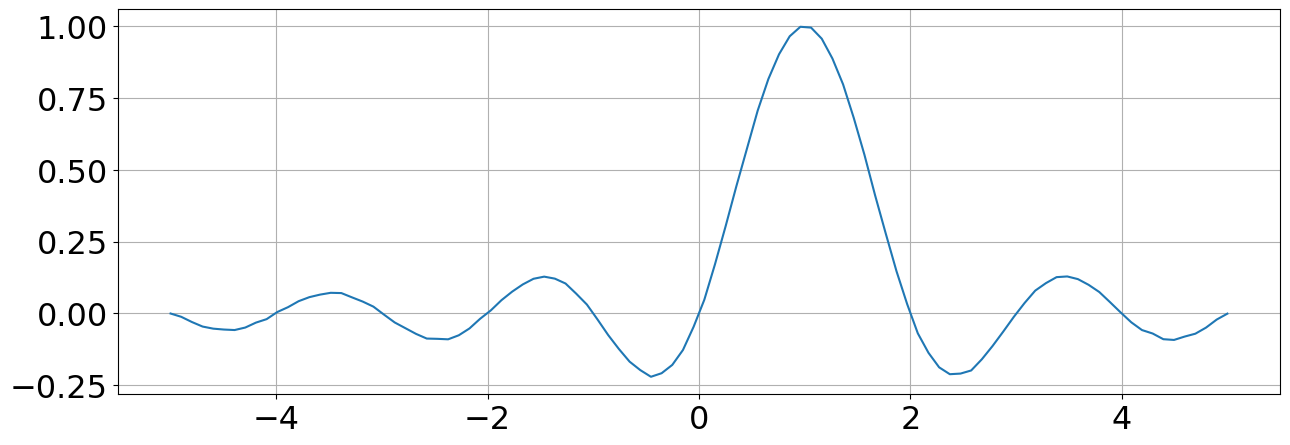

In [12]:
# Plot Synthetic Data
plt.plot(x,y)
plt.grid()

In [13]:
def cost(theta):
    yhat=np.sinc(x+theta)
    return np.sum((y-yhat)**2)

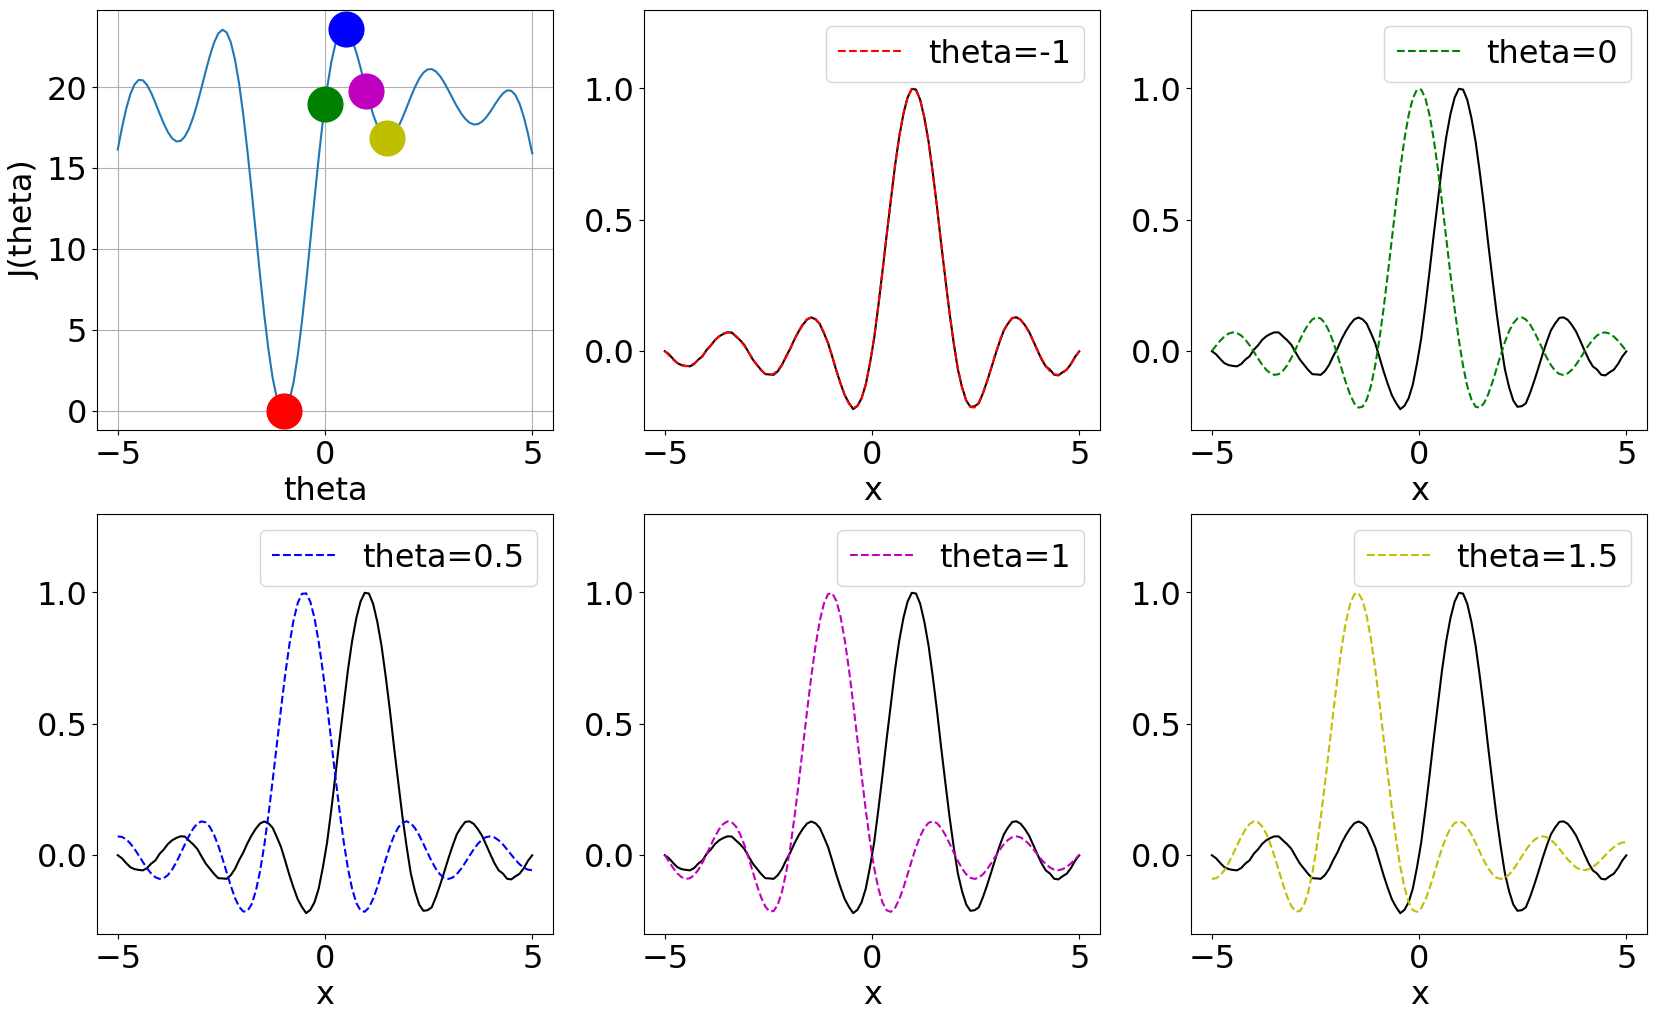

In [14]:
n_theta=100
theta=np.linspace(-5,5,n_theta)
J  =np.zeros(n_theta)

for j in range(n_theta):
    J[j]=cost(theta[j])

fig,axs=plt.subplots(2,3,figsize=[20,12])    
axs[0,0].plot(theta,J)    
axs[0,0].grid()
axs[0,0].set_xlabel('theta')
axs[0,0].set_ylabel('J(theta)')

theta_plot=[-1,0,0.5,1,1.5]
colors=['r','g','b','m','y']
k=0
for ax in axs.reshape(-1)[1:]:
    theta=theta_plot[k]
    k=k+1
    axs[0,0].plot(theta,cost(theta),'o',color=colors[k-1],markersize=25)
    ax.plot(x,y,'k')
    ax.set_xlabel('x')
    ax.plot(x,np.sinc(x+theta),'--',color=colors[k-1],label='theta='+str(theta))
    ax.set_ylim(-0.3,1.3)
    ax.legend()

# Gradient Descent
$$J(\theta)=\sum_j \left(y_j-\hat y_j(\theta)\right)^2=\sum \left(y_j-\text{sinc}(x_j-\theta)\right)^2$$
$$\frac{dJ}{d\theta}=-2\sum_j\left(y_j-\text{sinc}(x_j-\theta)\right)\frac{d\text{sinc}(x_j-\theta)}{d\theta}$$
$$\frac{dJ}{d\theta}=-2\sum_j \left(y_j-\text{sinc}(x_j-\theta)\right)\left[ \frac{\text{cos}(x_j-\theta)}{(x_j-\theta)}-\frac{\text{sin}(x_j-\theta)}{(x_j-\theta)^2}\right]$$

## 2- Dimentionsl

In [15]:
tau=np.linspace(0.1,10,300)
phi=np.linspace(-2*np.pi,2*np.pi,200)

J=np.zeros([len(tau),len(phi)])
for j1 in range(len(tau)):
    for j2 in range(len(phi)):
        J[j1,j2]=cost([tau[j1],phi[j2]])

ValueError: operands could not be broadcast together with shapes (100,) (2,) 

/var/folders/pr/3_264g5j1d15jdsjfgsqbdj80000gp/T/ipykernel_12865/3448347852.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  surf=ax.pcolor(X,Y,J,cmap=cm.get_cmap('turbo'),


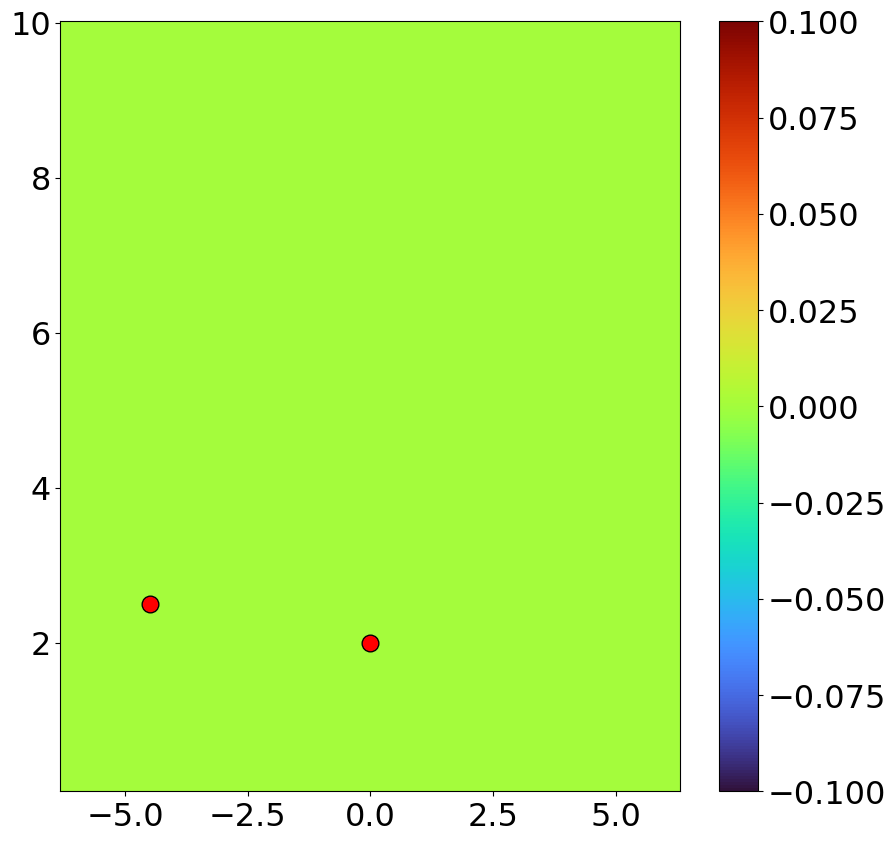

In [16]:
from matplotlib import cm
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=[10,10])
fig, ax = plt.subplots(1,figsize=[10,10])
X,Y=np.meshgrid(phi,tau)
surf=ax.pcolor(X,Y,J,cmap=cm.get_cmap('turbo'),
                       linewidth=0, antialiased=False)
fig.colorbar(surf,ax=ax)

plt.plot(0,2,'ko',markersize=12)
plt.plot(0,2,'ro',markersize=10)

plt.plot(-4.5,2.5,'ko',markersize=12)
plt.plot(-4.5,2.5,'ro',markersize=10)


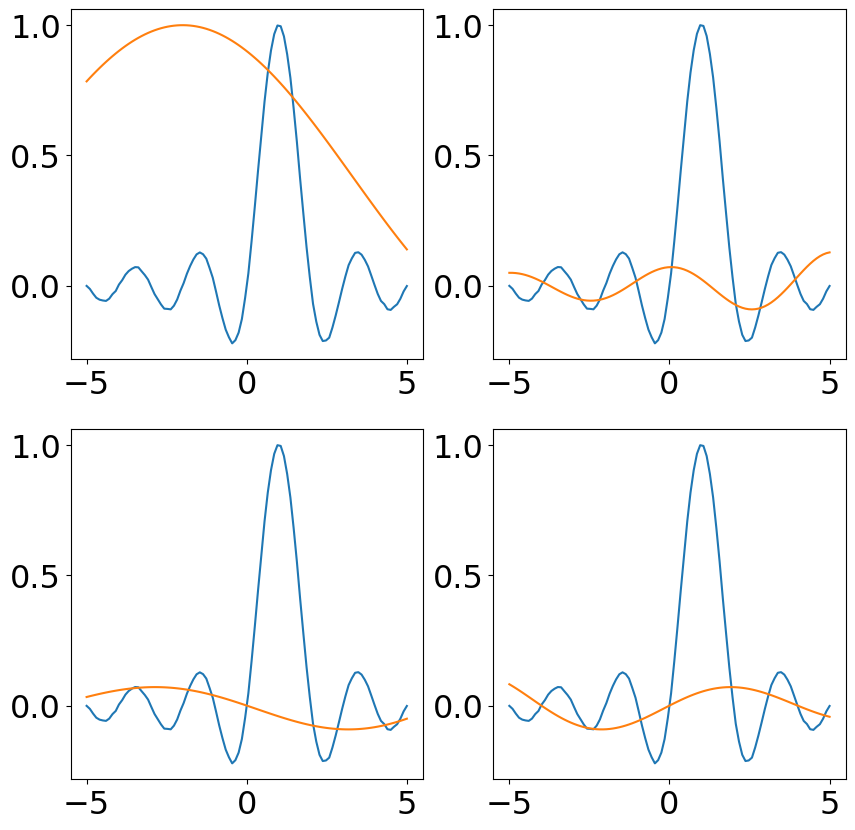

In [17]:
fig,ax=plt.subplots(2,2,figsize=[10,10])

ax[0,0].plot(x,y)
ax[0,0].plot(x,np.sinc(x/8+0.25))

ax[0,1].plot(x,y)
ax[0,1].plot(x,np.sinc(x/2.5-4.5))

ax[1,0].plot(x,y)
ax[1,0].plot(x,np.sinc(x/6-4))

ax[1,1].plot(x,y)
ax[1,1].plot(x,np.sinc(x/4+4))


# Polynomial

In [18]:
def yhat(theta,x):
    return np.sum(theta[0]*x+theta[1]*x**2)
def 

SyntaxError: invalid syntax (330047731.py, line 3)